In [2]:
using Pkg
Pkg.add(["Makie","CairoMakie","GLMakie"])

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


In [3]:
using DataFrames
import CairoMakie
mak = CairoMakie

CairoMakie

In [4]:
include("physical_constants.jl")

1.9268984e23

In [5]:
modeldir = "/home/math/Projects/CMFGEN-files-read-Julia/Test/Data/Md.dw2-XR.dw3"
include("read__MODEL.jl")
params_df = read__model(modeldir * "/MODEL")

Row,parameter,value,description
,String,Any,String
1,NUM_ITS,150.0,Number of iterations to perform
2,DO_LAM_IT,T,Do LAMBDA iterations ?
3,DO_GT_AUTO,T,Do a grey temperature iteration after revising USE_FIXED_J?
4,DO_T_AUTO,F,Allow temperature to vary when sufficent convergence has been obtained?
5,RSTAR,285.082,Stellar radius (in 10^10 cm)
6,RMAX,445.925,Maximum radius (in R*)
7,DO_HYDRO,T,Adjust hydrostatic structure
8,VEL_LAW,7.0,Velocity Law to be used
9,VEL_OPT,RVSIG_COL,Velocity option: RVSIG_COL or deKOTER


In [6]:
params_df[params_df.parameter .== "MDOT", :]

Row,parameter,value,description
,String,Any,String
1,MDOT,1.0e-8,Mass Loss rate (Msun/yr)


In [7]:
include("read__obs_fin.jl")
include("read__obs_cont.jl")

In [8]:
spec_cali = read__obs_fin(modeldir * "/obs/obs_fin")
spec_cont = read__obs_cont(modeldir * "/obs/obs_cont")

Row,freq,fflx
,Float64,Float64
1,994.149,9.0378e-265
2,992.491,9.0378e-265
3,990.836,9.0378e-265
4,989.183,9.0378e-265
5,987.534,9.0378e-265
6,985.887,9.0378e-265
7,984.242,9.0378e-265
8,982.601,9.0378e-265
9,980.962,9.0378e-265


In [16]:
spec_cali.wave = c_Ans ./ (spec_cali.freq .* 1e15)
spec_cont.wave = c_Ans ./ (spec_cont.freq .* 1e15)
spec_cali.flux = spec_cali.fflx .* spec_cali.freq .* 1e15 ./ (c_Ans ./ spec_cali.freq .* 1e15)
spec_cont.flux = spec_cont.fflx .* spec_cont.freq .* 1e15 ./ (c_Ans ./ spec_cont.freq .* 1e15)


spec_cali

Row,freq,fflx,wave,flux
,Float64,Float64,Float64,Float64
1,994.149,9.0378e-265,3.01557,2.97951e-277
2,992.491,9.0378e-265,3.02061,2.96958e-277
3,990.836,9.0378e-265,3.02565,2.95968e-277
4,989.183,9.0378e-265,3.03071,2.94982e-277
5,987.534,9.0378e-265,3.03577,2.93999e-277
6,985.887,9.0378e-265,3.04084,2.93019e-277
7,984.242,9.0378e-265,3.04592,2.92042e-277
8,982.601,9.0378e-265,3.05101,2.91069e-277
9,980.962,9.0378e-265,3.05611,2.90099e-277


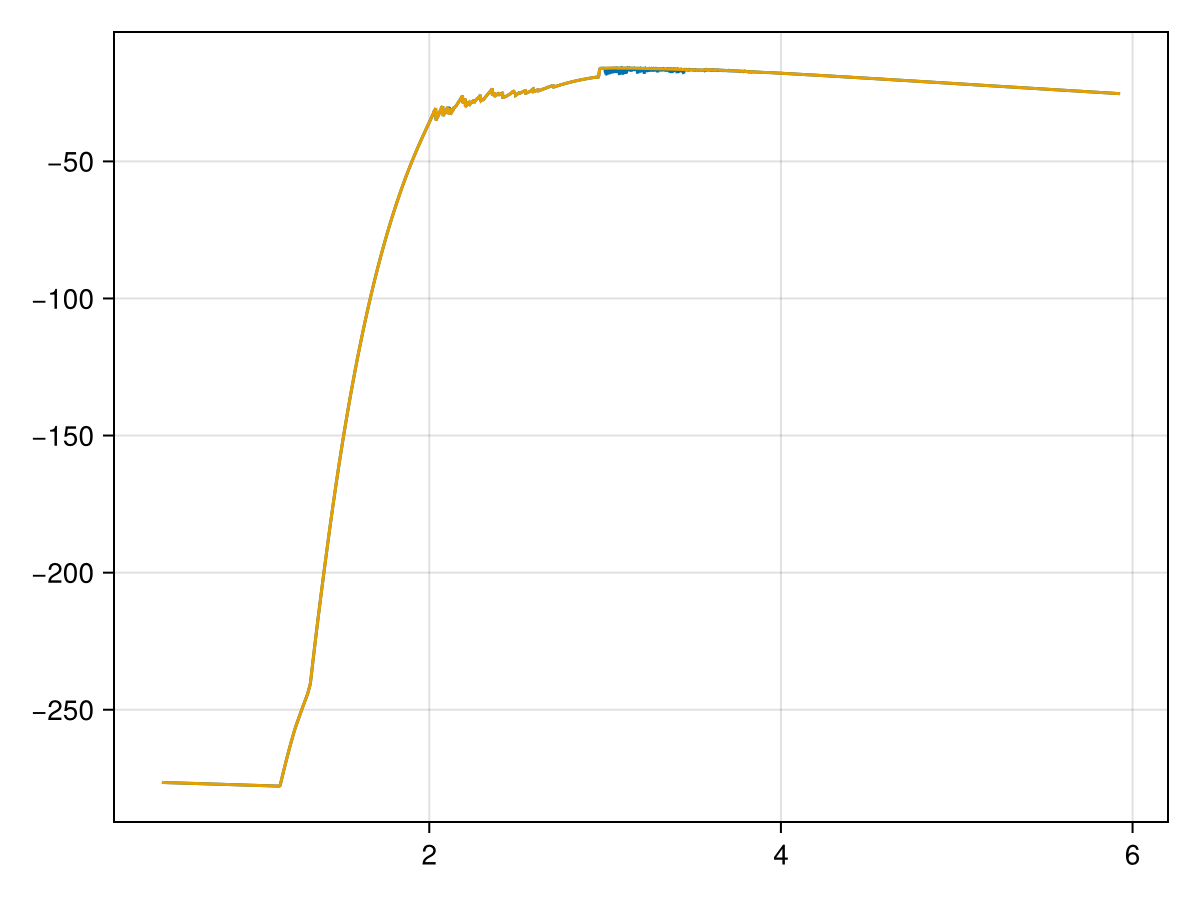

In [17]:
fig = mak.Figure()
ax = mak.Axis(fig[1,1],
    # limits=(2.5,5,-5,3)
    )   

mak.lines!(ax, log10.(spec_cali.wave), log10.(spec_cali.flux))
mak.lines!(ax, log10.(spec_cont.wave), log10.(spec_cont.flux))

fig

In [49]:
include("read__HYDRO.jl")

In [50]:
read__hydro(modeldir*"/HYDRO")

Row,R,V,% Error,VdVdR,dPdR/ROH,g_TOT,g_RAD,g_ELEC,Gamma,Depth,Tau,Vsound
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1.27125e5,258.84,-70.57,0.0023662,-0.0015251,0.0034215,0.0043639,0.00010659,4.63,1.0,4.93e-7,9.8
2,1.25766e5,258.82,-70.28,0.0024186,-0.001544,0.0034954,0.0044583,0.00010891,4.63,2.0,4.98e-7,9.8
3,1.23089e5,258.8,-69.73,0.0025255,-0.001581,0.0036478,0.004653,0.0001137,4.63,3.0,5.09e-7,9.8
4,117911.0,258.75,-68.62,0.0027565,-0.0016628,0.0039731,0.0050685,0.0001239,4.63,4.0,5.31e-7,9.81
5,1.082e5,258.63,-66.18,0.0033073,-0.0018631,0.0047151,0.006016,0.00014715,4.62,5.0,5.79e-7,9.81
6,91091.8,258.38,-60.08,0.0048992,-0.002455,0.0066515,0.0084868,0.00020762,4.62,6.0,6.89e-7,9.84
7,65261.4,257.73,-50.43,0.0099512,-0.003732,0.01293,0.016506,0.0004045,4.62,7.0,9.62e-7,9.89
8,46824.1,256.84,-45.11,0.019186,-0.0053165,0.025044,0.03199,0.00078581,4.61,8.0,1.34e-6,9.96
9,33628.7,255.61,-41.27,0.036888,-0.0075771,0.048492,0.061959,0.0015236,4.6,9.0,1.88e-6,10.04


In [51]:
include("read__MEANOPAC.jl")

In [52]:
read__meanopac(modeldir*"/MEANOPAC")

Row,R,I,Tau(Ross),/\\Tau,Rat(Ross) Chi(Ross),Chi(ross),Chi(Flux),Chi(es),Tau(Flux),Tau(es),Rat(Flux),Rat(es),Kappa(R),V(km/s)
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1.27125e5,1.0,4.922e-7,5.351e-9,0.0,3.894e-12,3.894e-12,1.573e-10,3.842e-12,2.0e-5,4.86e-7,0.0,0.0,0.3245
2,1.25766e5,2.0,4.975e-7,1.088e-8,2.03,3.978e-12,3.978e-12,1.607e-10,3.926e-12,2.02e-5,4.91e-7,2.03,2.03,0.3245
3,1.23089e5,3.0,5.084e-7,2.246e-8,2.06,4.154e-12,4.154e-12,1.677e-10,4.099e-12,2.07e-5,5.02e-7,2.06,2.06,0.3245
4,117911.0,4.0,5.309e-7,4.793e-8,2.13,4.528e-12,4.528e-12,1.828e-10,4.468e-12,2.16e-5,5.24e-7,2.13,2.13,0.3245
5,1.082e5,5.0,5.788e-7,1.094e-7,2.28,5.38e-12,5.38e-12,2.17e-10,5.308e-12,2.35e-5,5.72e-7,2.28,2.28,0.3245
6,91091.8,6.0,6.882e-7,2.739e-7,2.5,7.6e-12,7.6e-12,3.064e-10,7.497e-12,2.79e-5,6.79e-7,2.5,2.5,0.3246
7,65261.4,7.0,9.62e-7,3.817e-7,1.39,1.485e-11,1.485e-11,5.975e-10,1.464e-11,3.89e-5,9.49e-7,1.39,1.39,0.3248
8,46824.1,8.0,1.344e-6,5.329e-7,1.4,2.898e-11,2.898e-11,1.162e-9,2.854e-11,5.43e-5,1.33e-6,1.39,1.39,0.3251
9,33628.7,9.0,1.877e-6,7.438e-7,1.4,5.651e-11,5.651e-11,2.261e-9,5.561e-11,7.56e-5,1.85e-6,1.39,1.39,0.3254
